# Agenda

- Logistics 

-- What is API?

- Why to use API?

- Some Examples of API's

- Types of HTTP Status codes

- Token's and authentication

- [Github API](https://developer.github.com/v3/)

# Hw-1

- Extension (optional) to 09/24 4:30 PM

- If you want to submit right now: You will get 2pts (out of 10) bonus.

- [Google Form](https://forms.gle/Y3T4ycudhr9Yb4z26)

# Hw-2

- Due Date: Week-9 (10/08 - Thursday 4:30 PM)

- Data acquisition (Either with an API or web scraping) and wrangling

- Deliverables: Same as the first homework

    - Github Repo with organized ReadMe
    - Clean code for scraping - using API
    - A report notebook (Technical Notebook)
    
- [A Perfect Example](https://github.com/tgel0/spotify-data)

# What is an API?

API: __A__plication __P__rogramming __I__nterface

"It defines a way for services and products to communicate with each other through a documented interface"


__Why to use an API?__

- Share data easily

- Control/track shared data

- For users: CSV's as static - data changes rapidly

- You don't want to save all of the data -  You need only a smaller relevant part of the data.


- "Some APIs, like the Reddit and Spotify APIs, are designed to expand the reach of the organization by making their data available to users, and enabling external developers to build products that are in some way reliant on the business, and so keep customers coming back. For example, Spotify featured the “artist explorer” in the hopes that users will find new artists, build new playlists, and therefore continue (or start) using Spotify."

[Source](https://medium.com/@TebbaVonMathenstien/what-is-an-api-and-why-should-i-use-one-863c3365726b)

__Some Examples__

[Google Geolocation API](https://developers.google.com/maps/documentation/geolocation/overview)

[Spotify Web API](https://developer.spotify.com/documentation/web-api/)

[Twitter API](https://help.twitter.com/en/rules-and-policies/twitter-api)

[Sklearn API?](https://scikit-learn.org/stable/modules/classes.html)

__Example API: wikipedia__

In [141]:
# Install a conda package in the current Jupyter kernel
import sys
!conda install -c conda-forge --yes --prefix {sys.prefix} wikipedia

Solving environment: done

# All requested packages already installed.



In [142]:
## Let's import wikipedia - Make sure you installed it before importing
import wikipedia

## let's get some data

ds = wikipedia.page("Data Science")

## check summary, content, section, title, etc.
ds.summary;

[IBM - What is an API](https://developer.ibm.com/apiconnect/docs/what-is-an-api/)
[Wiki - API](https://en.wikipedia.org/wiki/API)

[What is an API - Why Should I Use It?](https://medium.com/@TebbaVonMathenstien/what-is-an-api-and-why-should-i-use-one-863c3365726b)

__What is a REST API?__

"A REST API is a web service that uses the REST (Representational State Transfer) architecture to handle a request on a frontend web service."

[Source: IBM - What is a REST API](https://www.ibm.com/cloud/learn/rest-apis)

__What are the actions we can do with REST__

- GET: To Request data from a specified resource.

- POST: To send data to a server to create/update a resource.

- PUT: To send data to a server to create/update a resource.

- DELETE: To delete the specified resource.

[Source](https://www.w3schools.com/tags/ref_httpmethods.asp)

__Python Requests Library__

"Requests is an elegant and simple HTTP library for Python, built for human beings."

First Let's make sure that `requests` library is installed.

[Python Requests Library](https://requests.readthedocs.io/en/master/)

In [3]:
## requests library installation
import sys
!conda install -c conda-forge --yes --prefix {sys.prefix} requests

Solving environment: done

# All requested packages already installed.



Now, let's see what are the some of the things we can do with `requests` library

In [28]:
## first import requests library
import requests
## The most simple/basic thing we will do with requests library
## is to make a request

r = requests.get('https://api.github.com/events')

## r is an Response object
type(r)

requests.models.Response

__Response Content__


In [5]:
## We can read the content of the server's response
## .text return string valued response- make educated guess about the encoding
r.text;

## .content returns bytes - for non-text requests

r.content;

## If you know that you are getting the data in json format:
r.json();

In [6]:
## we can check the status code of a response
r.status_code;

## note that bad responses will have different status code
bad_r = requests.get('https://httpbin.org/status/404')
bad_r.status_code;
## in our code if we want we can raise errors
bad_r.raise_for_status();

HTTPError: 404 Client Error: NOT FOUND for url: https://httpbin.org/status/404

[For More on Requests](https://requests.readthedocs.io/en/master/user/quickstart/#make-a-request)

__HTTP Status Codes__

* 200 — everything went okay, and the result has been returned (if any)
* 301 — the server is redirecting you to a different endpoint. This can happen when a company switches domain names, or an endpoint name is changed.
* 401 — the server thinks you’re not authenticated. This happens when you don’t send the right credentials to access an API (we’ll talk about authentication in a later post).
* 400 — the server thinks you made a bad request. This can happen when you don’t send along the right data, among other things.
* 403 — the resource you’re trying to access is forbidden — you don’t have the right permissions to see it.
* 404 — the resource you tried to access wasn’t found on the server.

[Source](https://www.digitalocean.com/community/tutorials/how-to-troubleshoot-common-http-error-codes)

__Let's see requests library in action__

[Open Notify API](http://open-notify.org/Open-Notify-API/)

In [7]:
## let's Use International Space Station's API
response = requests.get("http://api.open-notify.org/iss-now.json")

## Let's check the status code of the response

## What is the content of the response? Let's make is prettier

In [8]:
## converting timestamps to readable format
from datetime import datetime
readable = datetime.fromtimestamp(response.json()['timestamp']).isoformat()
print(readable)

2020-09-17T14:45:00


In [9]:
## here is an example of a failed request
bad_response = requests.get("http://api.open-notify.org/iss-pass.json")

## check the status code / note that there is still content in response

## WebScraping

In [20]:
!conda install -c conda-forge --yes --prefix {sys.prefix} beautifulsoup4


Solving environment: done

# All requested packages already installed.



In [59]:
html_doc = """
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""

[Source](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

In [88]:
soup = BeautifulSoup(html_doc, 'html.parser')
print(soup.prettify())

<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ;
and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>


<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ;
and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>



In [106]:
## check title

## check title's parent

## let's list the children of the body

## let's find_all paragraphs in the body

## find the first paragraph and then its siblings

In [108]:
soup.p.find_next_sibling().find_all('a')


[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

__Let's See Beautiful Soup in Action__

[Heat Hot Sauce Shop](https://heathotsauce.com/)

In [126]:
from bs4 import BeautifulSoup

In [129]:
# scrape all 19 pages to get names and urls

names = []
urls = []

# go to each page (print progress)
for i in range(1, 10):
    url = 'https://heathotsauce.com/collections/all?page=' + str(i)
    page = requests.get(url)
    print (i, page)
    soup = BeautifulSoup(page.content, 'html.parser')
    
    #in each page, scrape the names
    for j in soup.findAll('span', class_='title product-name-custom'):
        names.append(j.get_text())
    for k in soup.findAll(itemprop = 'url'):
        urls.append(k.get('href'))

1 <Response [200]>
2 <Response [200]>
3 <Response [200]>
4 <Response [200]>
5 <Response [200]>
6 <Response [200]>
7 <Response [200]>
8 <Response [200]>
9 <Response [200]>


In [130]:
import pandas as pd
#combine names and urls into a df
names_urls = pd.DataFrame({'names':names, 'urls':urls})

# add url to start of urls
names_urls['urls'] = names_urls['urls'].apply(lambda x: 'https://heathotsauce.com' + str(x))

In [139]:
names_urls.urls[3]


'https://heathotsauce.com/collections/all/products/512-pot-sauce'

In [136]:
## Go to each unique url, grab name, price, manufacturer, description

## NOTE: I requested too many timesand was timed out. 
## Do this in batches, save as different df, then concat together

name = []
mfc = []
price = []
desc = []
urls = []

for n, url in enumerate(names_urls['urls'][:10]):
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    
#     name
    try:
        name.append(soup.find('h1', class_='product_name').get_text())
    except:
        name.append('')
#     manufacturer
    try:
        mfc.append(soup.find('p', class_='vendor').get_text())
    except:
        mfc.append('')
#     price
    try:
        price.append(soup.find('span', class_='money').get_text())
    except:
        price.append('')
#     description
    try:
        desc.append(soup.find('div', class_='description').get_text())
    except:
        desc.append('')
#     url
    try:
        urls.append(url)
    except:
        urls.append('')
    
#     print progress, if response != 200, stop kernel. you have been timed out
    print (n, page)

df_1 = pd.DataFrame({'names':name,
                   'mfc':mfc,
                   'price':price,
                   'desc':desc,
                   'url':urls})

0 <Response [200]>
1 <Response [200]>
2 <Response [200]>
3 <Response [200]>
4 <Response [200]>
5 <Response [200]>
6 <Response [200]>
7 <Response [200]>
8 <Response [200]>
9 <Response [200]>


In [140]:
full_df.iloc[3]

names                                    512 Pot Sauce    
mfc                                              Mikey V's
price                                               $ 7.99
desc     A mellow, creamy roasted Jalapeno & tomatillo ...
url      https://heathotsauce.com/collections/all/produ...
Name: 3, dtype: object

In [133]:
# combine all df batches. strip manufacturers of \n
full_df = df_1
full_df['mfc'] = full_df['mfc'].apply(lambda x: x.strip())
full_df['desc'] = full_df['desc'].apply(lambda x: x.strip())

# remove gift sets and empty rows
full_df = full_df[full_df['mfc'] != 'Gift Set']
full_df = full_df[full_df['desc'] != '']
full_df.reset_index(inplace=True, drop=True)

# save df as csv
full_df.to_csv('hot_sauces.csv', encoding='utf-8', index=False)

In [134]:
soup.p.text

'$7.99 FLAT RATE SHIPPING\xa0+ Your Choice of Freebies'

In [135]:
soup

<!DOCTYPE html>

<!--[if lt IE 7 ]><html class="ie ie6" lang="en"> <![endif]-->
<!--[if IE 7 ]><html class="ie ie7" lang="en"> <![endif]-->
<!--[if IE 8 ]><html class="ie ie8" lang="en"> <![endif]-->
<!--[if IE 9 ]><html class="ie ie9" lang="en"> <![endif]-->
<!--[if (gte IE 10)|!(IE)]><!--><html lang="en"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="on" http-equiv="cleartype"/>
<meta content="index,follow" name="robots"/>
<title>Angry Cock - Heat</title>
<meta content="Made with 80% fresh Bhut Jolokia peppers (also known as ghost chiles) and a blend of select spices, Angry Cock is an extract free ultra hot sauce. Try in soups, gumbo and red beans &amp;amp; rice Heat Level: Extra Hot Ingredients: ﻿Bhut Jolokia Chiles, Vinegar, Onion, Garlic, Black Pepper, Chile Caribe, Salt, and a select " name="description">
<!-- Custom Fonts -->
<link href="//fonts.googleapis.com/css?family=.|Lato:light,normal,bold|Lato:light,normal,bold|PT+Sans+Narrow:light,normal,bold|Merriweathe

In [55]:
soup.find_all("a")

[<a href="/blogs/heatblog/update-on-the-health-crisis" title="Update on the health crisis">$7.99 FLAT RATE SHIPPING</a>,
 <a class="icon-menu" href="#nav"> <span>Menu</span></a>,
 <a class="icon-cart right" href="#cart"> <span>Cart</span></a>,
 <a href="/">Home</a>,
 <a href="/collections/all-sauces">Shop</a>,
 <a href="/collections/all-sauces">All Sauces</a>,
 <a href="/pages/our-brands">All Brands</a>,
 <a href="/pages/gift-sets">Gift Sets</a>,
 <a href="/collections/award-winning-hot-sauce">Award Winning</a>,
 <a href="/collections/hot-ones">Featured on Hot Ones</a>,
 <a href="/collections/sauces-featured-on-serious-eats">Featured on Serious Eats</a>,
 <a href="/collections/chile-powders">Pods &amp; Powders</a>,
 <a href="/collections/hot-sauce-sales">Sales</a>,
 <a href="/pages/about-us">About</a>,
 <a href="/pages/about-us">About Us</a>,
 <a href="/blogs/heatblog">Blog</a>,
 <a href="/pages/cheap-quick-shipping">Cheap Shipping</a>,
 <a href="/pages/all-about-chile-peppers">About C

In [23]:
# scrape all 19 pages to get names and urls

names = []
urls = []

# go to each page (print progress)
for i in range(1, 19):
    url = 'https://heathotsauce.com/collections/all?page=' + str(i)
    page = requests.get(url)
    print (i, page)
    soup = BeautifulSoup(page.content, 'html.parser')
    
    #in each page, scrape the names
    for j in soup.findAll('span', class_='title product-name-custom'):
        names.append(j.get_text())
    for k in soup.findAll(itemprop = 'url'):
        urls.append(k.get('href'))

1 <Response [200]>
2 <Response [200]>
3 <Response [200]>
4 <Response [200]>
5 <Response [200]>
6 <Response [200]>
7 <Response [200]>
8 <Response [200]>
9 <Response [200]>
10 <Response [200]>
11 <Response [200]>
12 <Response [200]>
13 <Response [200]>
14 <Response [200]>
15 <Response [200]>
16 <Response [200]>
17 <Response [200]>
18 <Response [200]>


In [56]:
soup.get_text()

"\n\n\n\n\n \n\n\n\n\nProducts Page 18 - Heat\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n  \n\n\n\n\n\n$7.99 FLAT RATE SHIPPING\xa0+ Your Choice of Freebies\n\n\n\n Menu\n Cart\n\n\n\n\nHome\n\nShop\n\nAll Sauces\nAll Brands\nGift Sets\nAward Winning\nFeatured on Hot Ones\nFeatured on Serious Eats\nPods & Powders\nSales\n\n\n\nAbout\n\nAbout Us\nBlog\nCheap Shipping\nAbout Chile Peppers\nSpicy Links\nBerkeley Storefront\n\n\nSauce of the Month\n\nAccount\n\nOnline Shop Account \nMonthly Club Account\nWishlist\n\n\n\n\n\n\nContinue Shopping\nYour Cart is Empty\n\n\n\n\n\n$7.99 FLAT RATE SHIPPING\xa0+ Your Choice of Freebies\n\n\n\n\n\n\n\n\n\n\n\nHome\nShop\n              ▾\n\n\nAll Sauces\nAll Brands\nGift Sets\nAward Winning\nFeatured on Hot Ones\nFeatured on Serious Eats\nPods & Powders\nSales\n\n\n\nAbout\n              ▾\n\n\nAbout Us\nBlog\nCheap Shipping\nAbout Chile Peppers\nSpicy Links\nBerkeley

__Query Parameters__

In [10]:
Latitude =  38.53
Longitude = - 77.02

parameters = {"lat": 40.71, "lon": -74}


# Make a get request with the parameters.
response = requests.get("http://api.open-notify.org/iss-pass.json", params=parameters)

response.json()

{'message': 'success',
 'request': {'altitude': 100,
  'datetime': 1600366053,
  'latitude': 40.71,
  'longitude': -74.0,
  'passes': 5},
 'response': [{'duration': 599, 'risetime': 1600385039},
  {'duration': 648, 'risetime': 1600390811},
  {'duration': 580, 'risetime': 1600396691},
  {'duration': 571, 'risetime': 1600402568},
  {'duration': 640, 'risetime': 1600408387}]}

In [11]:
readable = datetime.fromtimestamp(1600408387).isoformat()
print(readable)

2020-09-18T01:53:07


In [12]:
response= requests.get("http://api.open-notify.org/astros.json")
response.json()

{'number': 3,
 'people': [{'craft': 'ISS', 'name': 'Chris Cassidy'},
  {'craft': 'ISS', 'name': 'Anatoly Ivanishin'},
  {'craft': 'ISS', 'name': 'Ivan Vagner'}],
 'message': 'success'}

__Getting Access Tokens__

With that, lets go grab an access token from an API site and make some API calls!
Point your browser over to this [yelp page](https://www.yelp.com/developers/v3/manage_app) and start creating an app in order to obtain and api access token:

You can either sign in to an existing Yelp account, or create a new one, if needed.



<img src = "images/yelpapp.png" width = 550>

In [14]:
import configparser
config = configparser.ConfigParser()
config.read('./secrets.cfg')


['./secrets.cfg']

In [15]:
client_id = config['Yelp']['ClientId']
api_key = config['Yelp']['api_key']

In [16]:
term = 'Mexican'
location = 'Washington DC'
SEARCH_LIMIT = 10

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(api_key),
    }

url_params = {
                'term': term,
                'location': location,
                'limit': SEARCH_LIMIT
            }
response = requests.get(url, headers=headers, params=url_params)
print(response)
print(type(response.text))
print(response.text[:1000])

<Response [200]>
<class 'str'>
{"businesses": [{"id": "094fHChJkrJqztSFCn3ezA", "alias": "taqueria-habanero-washington", "name": "Taqueria Habanero", "image_url": "https://s3-media4.fl.yelpcdn.com/bphoto/Sy684B1dgmVmk9SQQ2HLSQ/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/taqueria-habanero-washington?adjust_creative=sHfPIWw2qKXvXAWiQlx3YA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=sHfPIWw2qKXvXAWiQlx3YA", "review_count": 839, "categories": [{"alias": "mexican", "title": "Mexican"}, {"alias": "cocktailbars", "title": "Cocktail Bars"}], "rating": 4.5, "coordinates": {"latitude": 38.93755, "longitude": -77.03309}, "transactions": ["delivery"], "price": "$$", "location": {"address1": "3710 14th St NW", "address2": null, "address3": "", "city": "Washington, DC", "zip_code": "20010", "country": "US", "state": "DC", "display_address": ["3710 14th St NW", "Washington, DC 20010"]}, "phone": "+12027227700", "display_phone": "(202) 722-7700", "distance": 

In [17]:
response.json()['businesses'][3]

{'id': 'iqV-9rIC-azTw9OQQc8Vhw',
 'alias': 'district-taco-washington-6',
 'name': 'District Taco',
 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/ZeENlUMU0yPpf-ge8U09_g/o.jpg',
 'is_closed': False,
 'url': 'https://www.yelp.com/biz/district-taco-washington-6?adjust_creative=sHfPIWw2qKXvXAWiQlx3YA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=sHfPIWw2qKXvXAWiQlx3YA',
 'review_count': 1591,
 'categories': [{'alias': 'mexican', 'title': 'Mexican'}],
 'rating': 4.0,
 'coordinates': {'latitude': 38.8976072, 'longitude': -77.030141},
 'transactions': ['pickup', 'delivery'],
 'price': '$',
 'location': {'address1': '1309 F St NW',
  'address2': '',
  'address3': '',
  'city': 'Washington, DC',
  'zip_code': '20004',
  'country': 'US',
  'state': 'DC',
  'display_address': ['1309 F St NW', 'Washington, DC 20004']},
 'phone': '+12023477359',
 'display_phone': '(202) 347-7359',
 'distance': 1522.4651389588491}

In [18]:
response.url

'https://api.yelp.com/v3/businesses/search?term=Mexican&location=Washington+DC&limit=10'

## Resources

[Python APIs](https://www.pythonforbeginners.com/api/list-of-python-apis)

[HTTP Status Codes](https://httpstatuses.com/101)

In [ ]:
import json
import requests


api_url_base = 'https://api.github.com/'
headers = {'Content-Type': 'application/json',
           'User-Agent': 'Python Student',
           'Accept': 'application/vnd.github.v3+json'}

def get_repos(username):

    api_url = '{}orgs/{}/repos'.format(api_url_base, username)

    response = requests.get(api_url, headers=headers)

    if response.status_code == 200:
        return (response.content)
    else:
        print('[!] HTTP {0} calling [{1}]'.format(response.status_code, api_url))
        return None
    
get_repos("mguner")

In [ ]:
prop=revisions&rvprop=content&rvsection=0

In [ ]:
http://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&rvsection=0&titles=pizza

In [ ]:
payload = {'action':'query',"format":"json",'prop': 'revisions', 'rvprop': 'content', 'rvsection': "1", 'titles': 'pizza'}
r = requests.get('http://en.wikipedia.org/w/api.php', params=payload)

In [ ]:
r.raise_for_status

In [ ]:
r = requests.get("https://api.spotify.com/v1/audio-analysis/6EJiVf7U0p1BBfs0qqeb1f")

In [ ]:
headers: {
    Authorization: `Bearer ${userAccessToken}`     
  }

In [ ]:
r.status_code

In [ ]:
r.json()

In [ ]:
a = []

if a:
    print("Murat")
    
else:
    print("something")

In [ ]:
import requests

response = requests.get("http://api.open-notify.org/this-api-doesnt-exist")

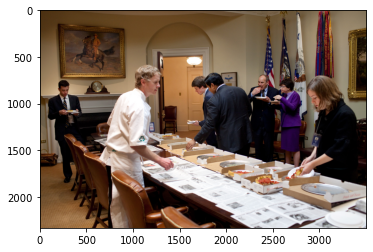

In [19]:
## extra
from PIL import Image
from io import BytesIO
r = requests.get("https://upload.wikimedia.org/wikipedia/commons/b/b0/Pizza_tasting_in_the_Roosevelt_Room.jpg")
i = Image.open(BytesIO(r.content))

import matplotlib.pyplot as plt

plt.imshow(i)
plt.show()

In [ ]:
response

In [ ]:
## 404 not found
print(response.status_code)


Other response codes:

- 200
- 301
- 400
- 401
- 403
- 404
- 503

Note that 2 -- family is overall good and 4-- family is not successful



In [ ]:
requests.get("https://test.wikipedia.org/w/api.php")

In [ ]:
import json 

import requests